# Take Home Challenge 

### PART 1

In [68]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [2]:
myjson = open('/Users/azarnajafli/Desktop/Springboard/SpringboardDSC/Projects/takehomechallenge1/logins.json', 'r')
json_data = myjson.read()
obj = json.loads(json_data)

In [3]:
obj

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [4]:
df = pd.DataFrame(obj)

In [5]:
df.login_time = pd.to_datetime(df.login_time)

In [6]:
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [7]:
agg_15min = df.resample('15min', on='login_time').count()

In [8]:
agg_15min

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [10]:
agg_15min.rename(columns = {'login_time':'count'}, inplace = True)

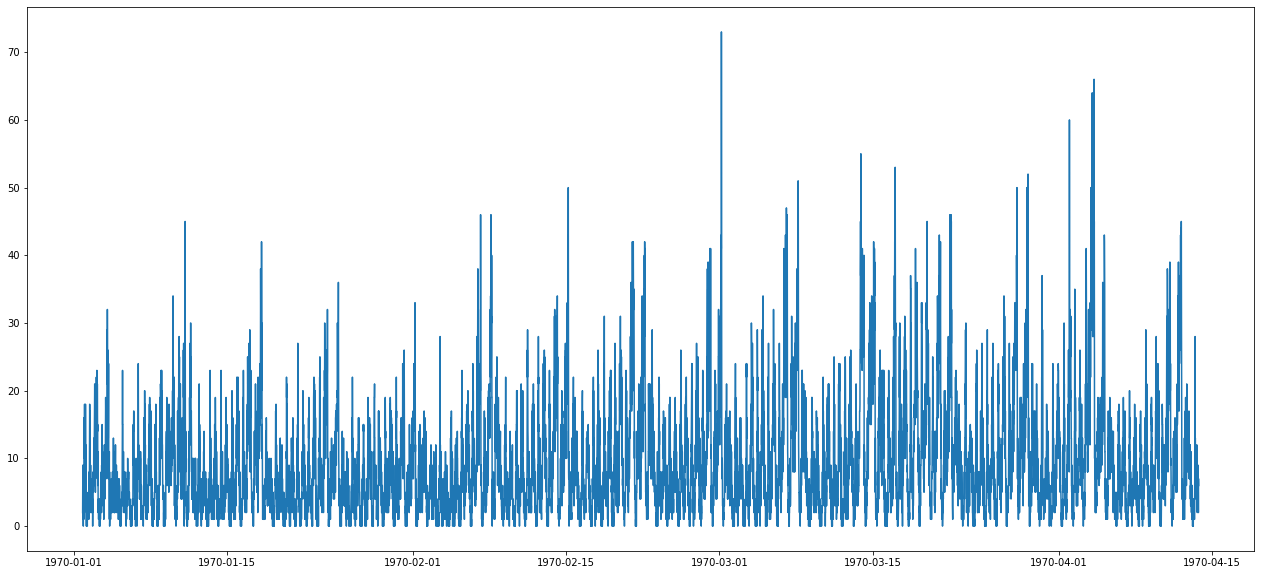

In [14]:
_ = plt.figure(figsize=(22, 10))
_ = plt.plot(agg_15min)

### PART 2

I would set a hypothesis test first. The null hypothesis will be if the driver pairs are exculisve for each city. Alternative hypothesis is vice verse. As I will compare the difference in two groups, that will be a two tailed test. I will use two tailed t test to prove any of the hypothesis to be correct.

### PART 3

In [39]:
myjson = open('/Users/azarnajafli/Desktop/Springboard/SpringboardDSC/Projects/takehomechallenge1/ultimate_data_challenge.json', 'r')
json_data = myjson.read()
obj_data = json.loads(json_data)

In [40]:
mydata = pd.DataFrame(obj_data)

In [41]:
mydata.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [42]:
mydata.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 15.3 MB


In [43]:
mydata.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [44]:
mydata['avg_rating_of_driver'] = mydata['avg_rating_of_driver'].fillna(mydata['avg_rating_of_driver'].mean())
mydata['avg_rating_by_driver'] = mydata['avg_rating_by_driver'].fillna(mydata['avg_rating_by_driver'].mean())
mydata['phone'] = mydata['phone'].fillna(mydata['phone'].value_counts().index[0])

In [45]:
mydata.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [47]:
mydata.ultimate_black_user.value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [70]:
mydata.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,0.37708,60.926084,5.796827,4.778158
std,3.792684,0.564977,0.222336,19.958811,0.48466,37.081503,5.707357,0.445753
min,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,0.00000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,0.00000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,1.00000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,1.00000,100.000000,160.960000,5.000000


### PREDICTIVE MODEL

In [49]:
classes = {False: 0, True: 1}
mydata.replace(classes, inplace = True)

In [51]:
X = mydata.drop(columns = 'ultimate_black_user')
X = pd.get_dummies(X)

y = mydata.ultimate_black_user

In [52]:
X.shape

(50000, 225)

In [53]:
y.shape

(50000,)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [59]:
clf = xgb.XGBClassifier()

In [60]:
param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [63]:
xgb_random = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)

In [64]:
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 58.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distri

In [65]:
pred = xgb_random.predict(X_test)

In [66]:
xgb_random.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [69]:
matrix = metrics.confusion_matrix(y_test, pred)
matrix

array([[6911,  793],
       [3683, 1113]])